In [3]:
library(rethinking)
data(milk)
d <- milk

d$K <- standardize( d$kcal.per.g )
d$N <- standardize( d$neocortex.perc )
d$M <- standardize( log(d$mass) )

dcc <- d[ complete.cases(d$K,d$N,d$M) , ]

In [5]:
data(WaffleDivorce)
d <- list()
d$A <- standardize( WaffleDivorce$MedianAgeMarriage )
d$D <- standardize( WaffleDivorce$Divorce )
d$M <- standardize( WaffleDivorce$Marriage )
m5.3_A <- quap(
alist(
## A -> D <- M
D ~ dnorm( mu , sigma ) ,
mu <- a + bM*M + bA*A ,
a ~ dnorm( 0 , 0.2 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
bA ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 ),
## A -> M
M ~ dnorm( mu_M , sigma_M ),
mu_M <- aM + bAM*A,
aM ~ dnorm( 0 , 0.2 ),
bAM ~ dnorm( 0 , 0.5 ),
sigma_M ~ dexp( 1 )
) , data = d )

stancode((m5.3_A))

Warning message in map2stan(object@formula, data = object@data, start = object@start, :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(object@formula, data = object@data, start = object@start, :
"Stripping scale attributes from variable A"
Warning message in map2stan(object@formula, data = object@data, start = object@start, :
"Stripping scale attributes from variable D"
Warning message in map2stan(object@formula, data = object@data, start = object@start, :
"Stripping scale attributes from variable M"


//2025-02-20 13:57:01.532814
data{
    int<lower=1> N;
    int<lower=1> N_M;
    real D[N];
    real M[N_M];
    real A[N];
}
parameters{
    real a;
    real bM;
    real bA;
    real<lower=0> sigma;
    real aM;
    real bAM;
    real<lower=0> sigma_M;
}
model{
    vector[N_M] mu_M;
    vector[N] mu;
    sigma_M ~ exponential( 1 );
    bAM ~ normal( 0 , 0.5 );
    aM ~ normal( 0 , 0.2 );
    for ( i in 1:N_M ) {
        mu_M[i] = aM + bAM * A[i];
    }
    M ~ normal( mu_M , sigma_M );
    sigma ~ exponential( 1 );
    bA ~ normal( 0 , 0.5 );
    bM ~ normal( 0 , 0.5 );
    a ~ normal( 0 , 0.2 );
    for ( i in 1:N ) {
        mu[i] = a + bM * M[i] + bA * A[i];
    }
    D ~ normal( mu , sigma );
}
generated quantities{
    vector[N_M] mu_M;
    vector[N] mu;
    for ( i in 1:N_M ) {
        mu_M[i] = aM + bAM * A[i];
    }
    for ( i in 1:N ) {
        mu[i] = a + bM * M[i] + bA * A[i];
    }
}



In [2]:
m5.5_draft <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bN*N ,
a ~ dnorm( 0 , 1 ) ,
bN ~ dnorm( 0 , 1 ) ,
sigma ~ dexp( 1 )
) , data=dcc )

stancode(m5.5_draft)

Warning message in map2stan(object@formula, data = object@data, start = object@start, :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Will attempt to remove dots internally.

Will attempt to remove dots internally.

Will attempt to remove dots internally.

Will attempt to remove dots internally.

Will attempt to remove dots internally.



//2025-02-20 13:54:30.878884
data{
    int<lower=1> N;
    real K[N];
}
parameters{
    real a;
    real bN;
    real<lower=0> sigma;
}
model{
    vector[N] mu;
    sigma ~ exponential( 1 );
    bN ~ normal( 0 , 1 );
    a ~ normal( 0 , 1 );
    for ( i in 1:N ) {
        mu[i] = a + bN * N[i];
    }
    K ~ normal( mu , sigma );
}
generated quantities{
    vector[N] mu;
    for ( i in 1:N ) {
        mu[i] = a + bN * N[i];
    }
}



In [3]:
prior <- extract.prior( m5.5_draft )
xseq <- c(-2,2)
mu <- link( m5.5_draft , post=prior , data=list(N=xseq) )

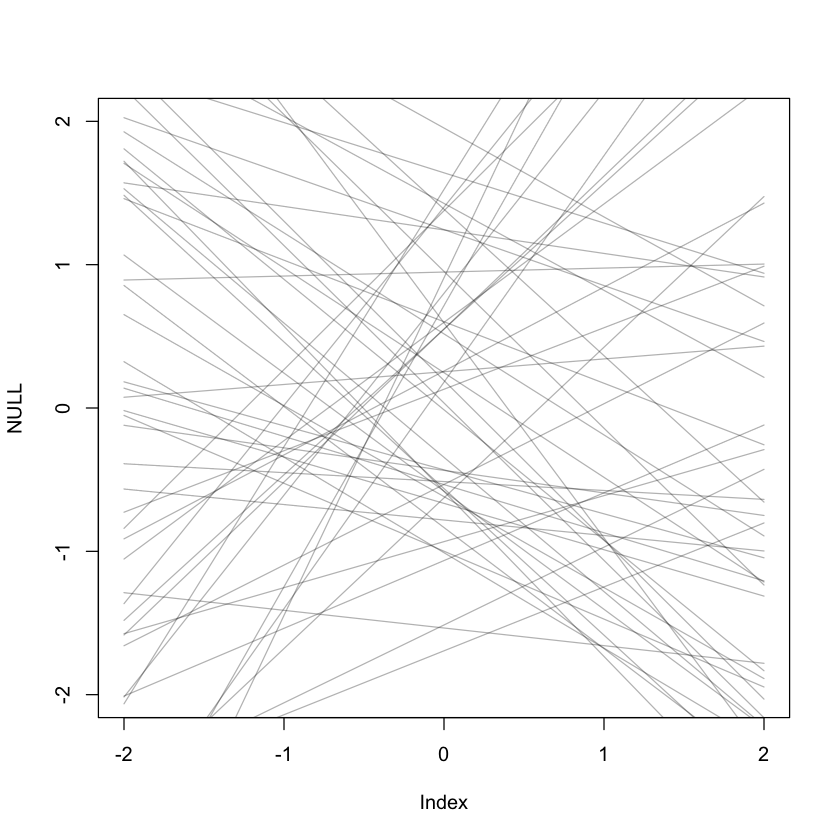

In [4]:
plot( NULL , xlim=xseq , ylim=xseq )
for ( i in 1:50 ) lines( xseq , mu[i,] , col=col.alpha("black",0.3) )

In [5]:
m5.5 <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bN*N ,
a ~ dnorm( 0 , 0.2 ) ,
bN ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data=dcc )

In [6]:
precis( m5.5 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.03994288,0.1544914,-0.2069642,0.2868499
bN,0.13322999,0.2237487,-0.2243637,0.4908237
sigma,0.99983047,0.1647122,0.7365886,1.2630724


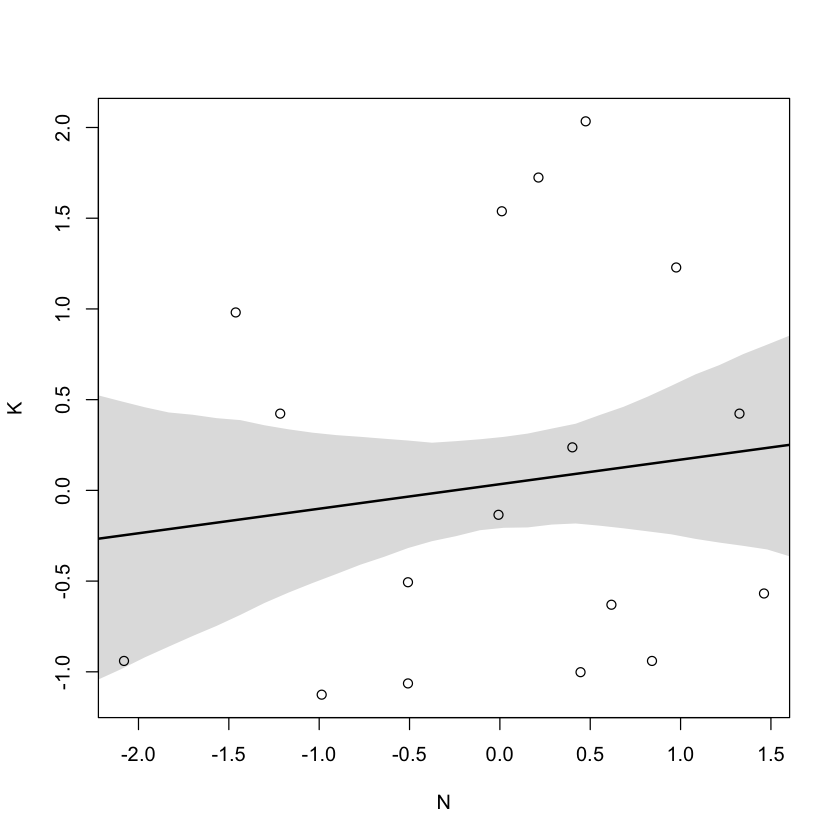

In [7]:
xseq <- seq( from=min(dcc$N)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.5 , data=list(N=xseq) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ N , data=dcc )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

In [8]:
m5.6 <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bM*M ,
a ~ dnorm( 0 , 0.2 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data=dcc )
precis(m5.6)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.04646254,0.1512793,-0.1953109,0.28823600
bM,-0.28247904,0.1928793,-0.5907374,0.02577929
sigma,0.94925830,0.1570525,0.6982581,1.20025854


In [9]:
m5.7 <- quap(
alist(
K ~ dnorm( mu , sigma ) ,
mu <- a + bN*N + bM*M ,
a ~ dnorm( 0 , 0.2 ) ,
bN ~ dnorm( 0 , 0.5 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 )
) , data=dcc )
precis(m5.7)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.0679918,0.1339987,-0.1461639,0.2821476
bN,0.6751173,0.2482986,0.2782882,1.0719464
bM,-0.7029909,0.2207870,-1.0558511,-0.3501307
sigma,0.7380141,0.1324617,0.5263146,0.9497135


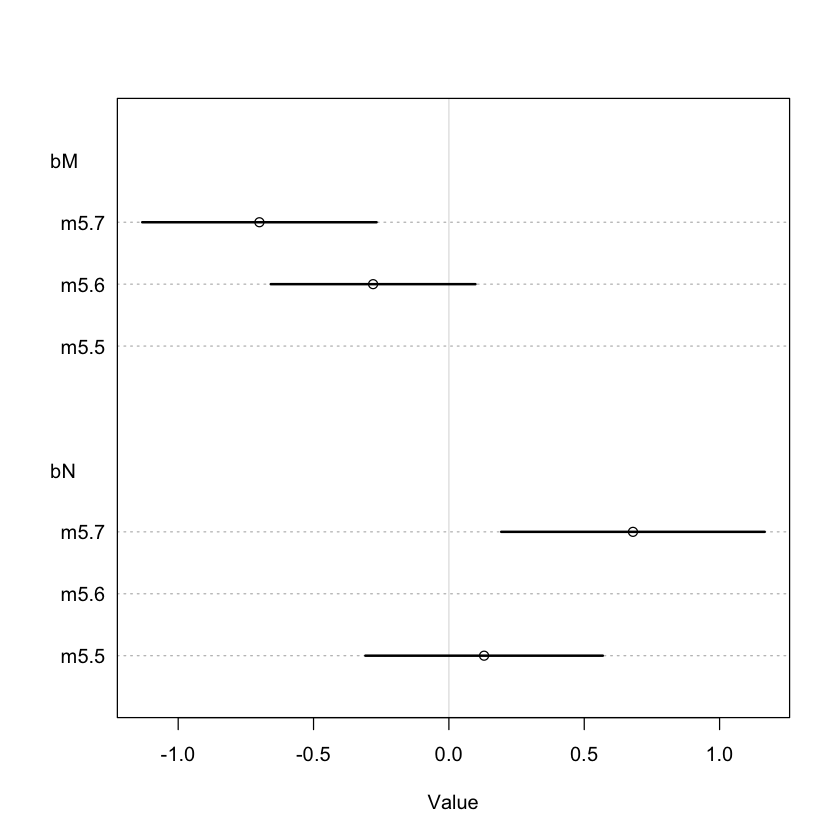

In [10]:
plot( coeftab( m5.5 , m5.6 , m5.7 ) , pars=c("bM","bN") )

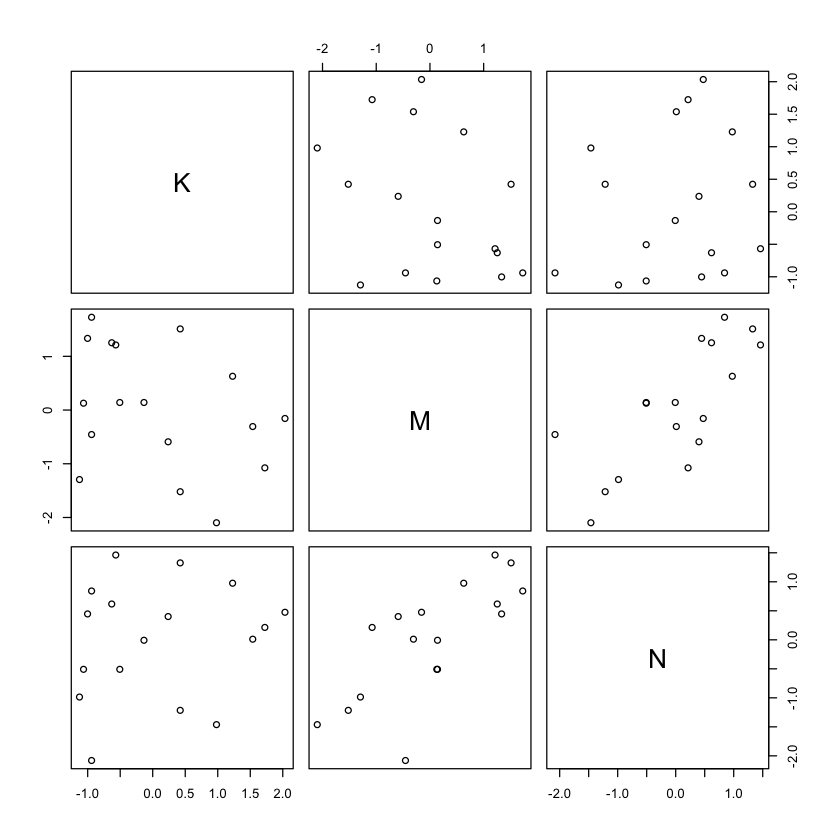

In [11]:
pairs( ~K + M + N , dcc )

In [13]:
# M -> K <- N
# M -> N
n <- 100
M <- rnorm( n )
N <- rnorm( n , M )
K <- rnorm( n , N - M )
d_sim <- data.frame(K=K,N=N,M=M)

# M -> K <- N
# N -> M
n <- 100
N <- rnorm( n )
M <- rnorm( n , N )
K <- rnorm( n , N - M )
d_sim2 <- data.frame(K=K,N=N,M=M)

# M -> K <- N
# M <- U -> N
n <- 100
U <- rnorm( n )
N <- rnorm( n , U )
M <- rnorm( n , U )
K <- rnorm( n , N - M )
d_sim3 <- data.frame(K=K,N=N,M=M)

In [18]:
library(dagitty)

dag5.7 <- dagitty( "dag{
M -> K <- N
M -> N }" )
coordinates(dag5.7) <- list( x=c(M=0,K=1,N=2) , y=c(M=0.5,K=1,N=0.5) )
MElist <- equivalentDAGs(dag5.7)

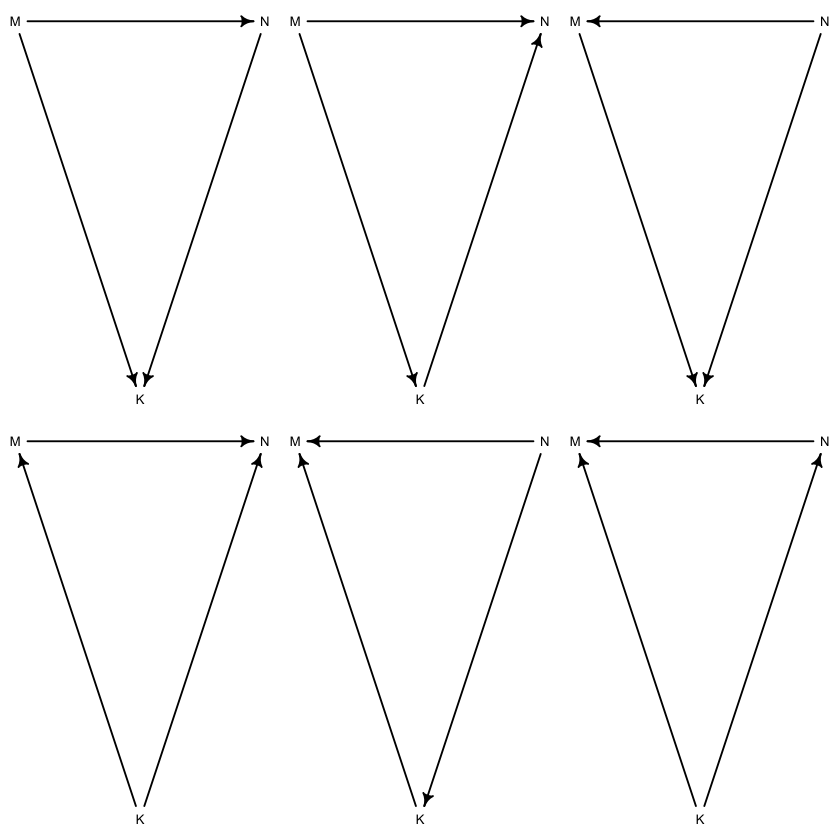

In [20]:
drawdag(MElist)